<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [14]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# All-Star Pokemon team:

## Introduction
This project is a fun exercise in data wrangling and analysis, mostly using pandas, matplotlib and seaborn to visualize the data. The goal of the project is to find the optimal setup for a pokemon team according to the rules of the famous Gameboy games Pokemon Red & Blue. I will try my best to explain the principles that guide my decisions in the analysis but won't go in extensive detail about the underlying mechanics, for that goes beyond the purpose of this exercise.

A quick recap (for anyone who isn't a '90's kid): you need 6 pokemon to create a full team, the pokemon have different attack moves, affinity types and combat stats that decide their use and strength in battle. The game is mostly rock-paper-scissors based and therefore it's neccesary to have a good mix of versatile pokemon with strong moves. In battle some moves can cause status effect, potentially immobilizing or restricting the opponent.

Pro tips guiding the analyses: 
- Normal type pokemon are considered the best types due to the inability to be countered properly. 
- Sleep, Frozen & Paralyzed are considered to be the strongest status effects.
- Moves also have affinity types and if they match the pokemon's affinity they increase the moves damage by a substantial(50%) amount, it's reffered to as Same Type Attack Bonus (STAB).

Before we start our analysis let's load our data and import our packages:


In [1]:
# importing the standard packages, plot inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# opening up a path to the datafiles and saving the data to a Dataframe
import os
import pandas as pd
notebook_path = os.path.abspath("PokemonEDA.ipynb")
csv = os.path.join(os.path.dirname(notebook_path), "PokemonGen1.csv")
with open(csv) as file:
    df = pd.read_csv(file, index_col=0, sep=';')

If we take a look at the dataset we will see multiple tables that describe the following variables:

- '#': ID for each pokemon

- Name: name of each pokemon

- Type 1: affinity type of the pokemon, deciding it's weaknesses and strengths vs. other types

- Type 2: Some pokemon have 2 types

- HP: Hit points define how much damage a pokemon can take before fainting

- Attack: base modifier for attacks of normal attacks

- Defense: base resistance modifier against normal attacks

- Sp. Atk: base modifier for special attacks

- Sp. Def: base resistance modifier against special attacks

- Speed: the fastest pokemon will start their turn first

- Total: sum of the six previously mentioned combat stats

- Stage: 'evolution' stage of the pokemon

- Legendary: whether the pokemon is considered a legendary pokemon

In [2]:
# Let's drop the columns we won't be using
df = df.drop(['Stage', 'Legendary'], axis=1)
df.rename(columns={'Type 1': 'Type_1', 'Type 2': 'Type_2'}, inplace=True)
df.head(5)


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
4,Charmander,Fire,NaN,309,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80


# Pokemon Types

Let's examine the distribution of the different types that are available in the game:

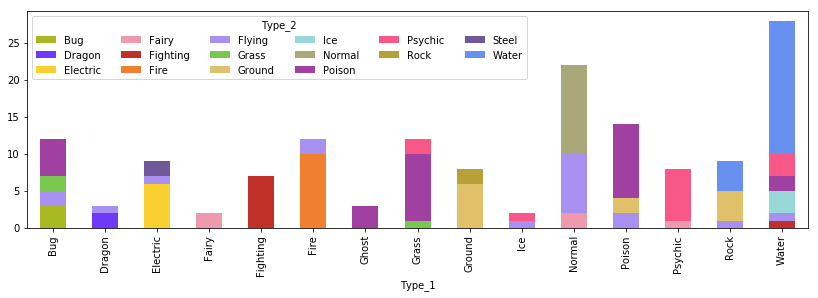

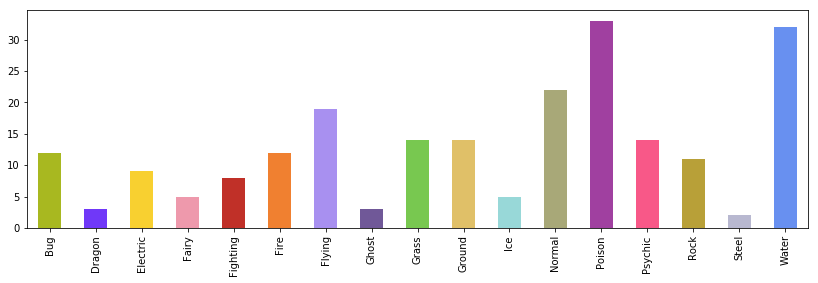

In [3]:
# The original game's color palette for types used in the next graph
colors = ['#A8B820',  # Bug
          '#7038F8',  # Dragon
          '#F8D030',  # Electric
          '#EE99AC',  # Fairy
          '#C03028',  # Fighting
          '#F08030',  # Fire
          '#A890F0',  # Flying
          '#78C850',  # Grass
          '#E0C068',  # Ground
          '#98D8D8',  # Ice
          '#A8A878',  # Normal
          '#A040A0',  # Poison
          '#F85888',  # Psychic
          '#B8A038',  # Rock
          '#705898',  # Ghost
          '#6890F0',  # Water
]

# Create stacked-bar graph for Type 1 and 2
# Fill in type 1 when type 2 is NaN. This way the NaN values return the colours of the original types
df['Type_2 config'] = df['Type_2']
df['Type_2 config'].fillna(value=df['Type_1'], inplace=True)
type_cross = pd.crosstab(df['Type_1'], df['Type_2 config'])
type_cross.plot.bar(stacked=True, figsize=(14,4), color=colors)
plt.legend(loc='upper left', ncol=6, fontsize=10, title="Type_2")
plt.show()
df = df.drop(['Type_2 config'], axis=1); # Revert back to the original df

# The original game's color palette for types used in the next graph
colors = ['#A8B820',  # Bug
          '#7038F8',  # Dragon
          '#F8D030',  # Electric
          '#EE99AC',  # Fairy
          '#C03028',  # Fighting
          '#F08030',  # Fire
          '#A890F0',  # Flying
          '#705898',  # Ghost
          '#78C850',  # Grass
          '#E0C068',  # Ground
          '#98D8D8',  # Ice
          '#A8A878',  # Normal
          '#A040A0',  # Poison
          '#F85888',  # Psychic
          '#B8A038',  # Rock
          '#B8B8D0',  # Steel
          '#6890F0',  # Water
]

# Create second bar graph that shows the total amount of types present in both Type 1 and Type 2
both_counts = pd.concat([df['Type_1'].value_counts(), df['Type_2'].value_counts()], axis=1, sort=True)
both_counts = both_counts.fillna(0)['Type_1'] + both_counts.fillna(0)['Type_2']
both_counts.plot.bar(figsize=(14,4), color=colors)

# Stats distribution

## Heatmap

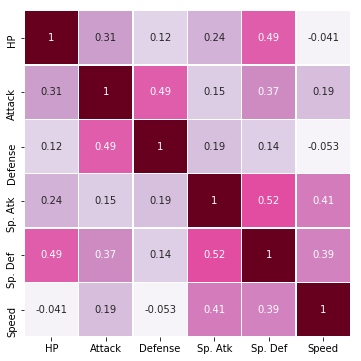

In [4]:
#Create heatmap for all stats, excluding Total
Feeltheburn = df.drop("Total", axis=1).corr()
plt.figure(figsize = (15,6))
sns.heatmap(Feeltheburn, annot=True, linewidths=.5, square=True, cmap='PuRd', cbar=False)

## Swarmplot

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775
std,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880
min,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000
25%,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000
50%,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000
75%,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000
max,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000


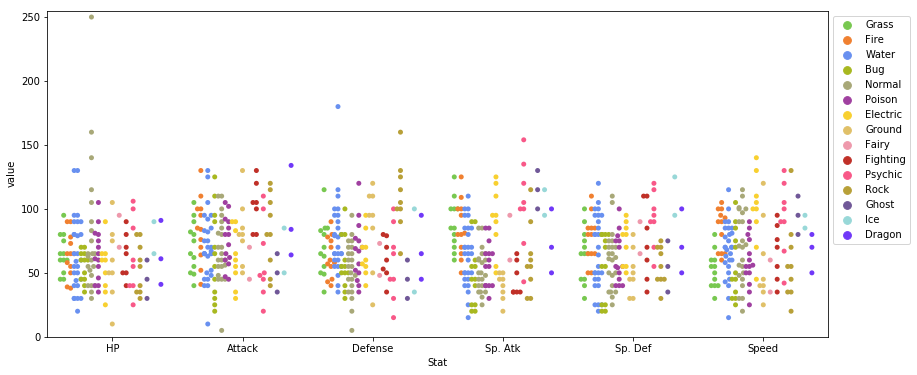

In [5]:
stats = df.iloc[:, :10].drop('Total', axis=1)

colors = [
'#78C850',  # Grass
'#F08030',  # Fire
'#6890F0',  # Water
'#A8B820',  # Bug
'#A8A878',  # Normal
'#A040A0',  # Poison
'#F8D030',  # Electric       
'#E0C068',  # Ground
'#EE99AC',  # Fairy
'#C03028',  # Fighting
'#F85888',  # Psychic
'#B8A038',  # Rock
'#705898',  # Ghost
'#98D8D8',  # Ice
'#7038F8',  # Dragon      
]

# Create a swarmplot with all stats included, grouped by type
melted_stats = pd.melt(stats, 
                    id_vars=["Name", "Type_1", "Type_2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_stats.head()
plt.figure(figsize=(14,6))
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_stats, 
              hue='Type_1', 
              dodge=True, 
              palette=colors)
plt.ylim(0, 255)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

stats.describe()

## Interactive Pokemon Graph

In [6]:
# Importing neccessary packages
from bokeh.io import output_notebook, show, push_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool, CategoricalColorMapper, ColumnDataSource
from ipywidgets import interact
output_notebook()

Loading BokehJS ...

In [7]:
# Create the ColumnDataSource: source
source = ColumnDataSource(data={
    'x': df.Attack,
    'y': df.Defense,
    'type': df.Type_1,
    'name': df.Name
})

# Setting up the color palette for pokemon type
color_mapper = CategoricalColorMapper(factors=list(df.Type_1.unique()),
                                          palette=colors)
# Setting up Hovertool
hover = HoverTool(tooltips=[('name', '@name'), 
                            ('type', '@type'), 
                           ])

# Plotting the figure
PLOT_OPTS = dict(
    plot_width=700,
    plot_height=400,
    x_range=(0, 260),
    y_range=(0, 260)
)

p = figure(title='Interactive Pokemon Stats', tools=[hover], **PLOT_OPTS)

# plotting the data points
p.circle(x='x',
         y='y',
         color={'field':'type', 'transform': color_mapper}, 
         alpha=0.8,
         source=source
         )

# Function to update the plot
def update_plot(x_axis, y_axis, Type_1):
    if Type_1 == 'All' :
        new_data = {
            'x': df.loc[:, x_axis],
            'y': df.loc[:, y_axis],
            'type': df.Type_1,
            'name': df.Name
        }
        source.data = new_data
        p.xaxis.axis_label = x_axis
        p.yaxis.axis_label = y_axis
        p.title.text = str(x_axis) + ' vs. ' + str(y_axis)
        push_notebook()
    else:
        new_data = {
            'x': df.loc[df['Type_1'] == Type_1][x_axis],
            'y': df.loc[df['Type_1'] == Type_1][y_axis],
            'type': df.loc[df['Type_1'] == Type_1].Type_1,
            'name': df.loc[df['Type_1'] == Type_1].Name
        }
        source.data = new_data
        p.xaxis.axis_label = x_axis
        p.yaxis.axis_label = y_axis
        p.title.text = str(x_axis) + ' vs. ' + str(y_axis)
        push_notebook()

       
interact(update_plot,
         x_axis=['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP'],
         y_axis=['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP'],
         Type_1=['All', 'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
             'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
             'Dragon'])
        
show(p, notebook_handle=True)



interactive(children=(Dropdown(description='x_axis', options=('Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. De…

# Got the Moves

Within pokemon there are certain moves that are considered very strong due to either their strategic advantage, their pure power or due to bringing one of the stronger status effect to the battle. For my team I've chosen the next moves to be present in my team:

- Earthquake
- Hyper Beam
- Body Slam
- Blizzard


In [16]:
Earthquake_able = ['Arbok','Blastoise','Charizard','Cubone','Diglett','Dugtrio','Ekans','Geodude','Golem','Graveler',
                   'Kangaskhan','Lickitung','Machamp','Machoke','Machop','Marowak','Mew','Nidoking','Nidoqueen','Onix',
                   'Poliwhirl','Poliwrath','Rhydon','Rhyhorn','Sandshrew','Sandslash','Slowbro','Slowpoke','Snorlax','Tauros'
                  ]

Hyperbeam_able = ['Aerodactyl','Alakazam','Arbok','Arcanine','Articuno','Beedrill','Blastoise','Butterfree','Chansey',
                  'Charizard','Clefable','Cloyster','Dewgong','Dodrio','Dragonair','Dragonite','Dratini','Dugtrio','Electabuzz',
                  'Electrode','Exeggutor','Fearow','Gengar','Golbat','Golduck','Golem','Gyarados','Hypno','Jolteon','Jynx',
                  'Kabutops','Kangaskhan','Kingler','Lapras','Lickitung','Machamp','Magmar','Magneton','Marowak','Mew',
                  'Mewtwo','Moltres','Mr. Mime','Muk','Nidoking','Nidoqueen','Ninetales','Omastar','Parasect','Persian','Pidgeot',
                  'Pinsir','Poliwrath','Porygon','Primeape','Raichu','Rapidash','Raticate','Rhydon','Sandslash','Scyther',
                  'Seadra','Seaking','Slowbro','Snorlax','Starmie','Tangela','Tauros','Tentacruel','Vaporeon','Venomoth',
                  'Venusaur','Victreebel','Vileplume','Weezing','Wigglytuff','Zapdos']

Body_slam_able = ['Abra','Alakazam','Arbok','Arcanine','Blastoise','Bulbasaur','Chansey','Charizard','Charmander','Charmeleon',
                  'Clefable','Clefairy','Cubone','Dewgong','Diglett','Dodrio','Doduo','Dragonair','Dragonite','Dratini',
                  'Drowzee','Dugtrio','Eevee','Ekans','Electabuzz','Farfetchd','Flareon','Gengar','Geodude','Golduck','Golem','Graveler',
                  'Grimer','Growlithe','Gyarados','Hitmonchan','Hitmonlee','Hypno','Ivysaur','Jigglypuff','Jolteon','Jynx',
                  'Kabuto','Kabutops','Kadabra','Kangaskhan','Kingler','Krabby','Lapras','Lickitung','Machamp','Machoke',
                  'Machop','Magmar','Mankey','Marowak','Meowth','Mew','Mewtwo','Mr. Mime','Muk','Nidoking','Nidoqueen','Nidoran-F',
                  'Nidoran-M','Nidorina','Nidorino','Ninetales','Omanyte','Omastar','Onix','Paras','Parasect','Persian',
                  'Pikachu','Pinsir','Poliwag','Poliwhirl','Poliwrath','Ponyta','Primeape','Psyduck','Raichu','Rapidash','Raticate',
                  'Rattata','Rhydon','Rhyhorn','Sandshrew','Sandslash','Seel','Slowbro','Slowpoke','Snorlax','Squirtle','Tangela',
                  'Tauros','Vaporeon','Venusaur','Victreebel','Vileplume','Vulpix','Wartortle','Wigglytuff']

Blizzard_able = ['Articuno','Blastoise','Chansey,','Clefable','Clefairy','Cloyster','Cubone','Dewgong','Dragonair','Dragonite','Dratini',
                 'Goldeen','Golduck','Gyarados','Horsea','Jigglypuff','Jynx','Kabuto','Kabutops','Kangaskhan','Kingler','Krabby',
                 'Lapras','Lickitung','Marowak','Mew','Mewtwo','Nidoking','Nidoqueen','Nidoran-F','Nidoran-M','Nidorina',
                 'Nidorino','Omanyte','Omastar','Poliwag','Poliwhirl','Poliwrath','Porygon','Psyduck','Raticate','Rattata','Rhydon',
                 'Seadra','Seaking','Seel','Shellder','Slowbro','Slowpoke','Snorlax','Squirtle','Starmie','Staryu','Tauros',
                 'Tentacool','Tentacruel','Vaporeon','Wartortle','Wigglytuff']

Hypnosis_able = ['Drowzee','Exeggcute','Exeggutor','Gastly','Gengar','Haunter','Hypno','Poliwag','Poliwhirl','Poliwrath']

Sleep_powder_able = ['Bellsprout','Bulbasaur','Butterfree','Exeggcute','Exeggutor','Gloom','Ivysaur','Oddish','Tangela','Venomoth',
                     'Venonat','Venusaur','Victreebel','Vileplume', 'Weepinbell']

In [17]:
df['EarthQuake'] = df['Name'].apply(lambda x: '1' if x in Earthquake_able else '0')
df['Blizzard'] = df['Name'].apply(lambda x: '1' if x in Blizzard_able else '0')

In [18]:
both_normal_attacks = [x for x in Hyperbeam_able if x in Body_slam_able]
either_sleeper_attacks = list(Hypnosis_able)
either_sleeper_attacks.extend(x for x in Sleep_powder_able if x not in either_sleeper_attacks)

In [19]:
df['Sleeper'] = df['Name'].apply(lambda x: '1' if x in either_sleeper_attacks else '0')
df['Beam and Body'] = df['Name'].apply(lambda x: '1' if x in both_normal_attacks else '0')
df


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,EarthQuake,Blizzard,Sleeper,Beam and Body
#,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0,0,1,0
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0,0,1,0
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0,0,1,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,0,0,0,0
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,0,0,0,0
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,0,0,1
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,0,1,0,0
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,0,1,0,0
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,1,0,1
